<a href="https://colab.research.google.com/github/SergioManuelJob/NaiveBayes-Clasificators/blob/main/Clasificadores_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sergio Manuel Suárez Suárez

In [ ]:
# importación de datos
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
iris = sns.load_dataset('iris')

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [ ]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)

In [ ]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
y_model

ytest_df= ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
ytest_df

y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_array = y_model_df['species'].to_numpy()
y_model_array

In [ ]:
from sklearn.naive_bayes import MultinomialNB
modelMultinomial = MultinomialNB()
modelMultinomial.fit(Xtrain, ytrain)
y_modelMultinomial = modelMultinomial.predict(Xtest)
y_modelMultinomial

ytest_df= ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
ytest_df

y_model_dfMultinomial= pd.DataFrame(y_modelMultinomial, columns = ['species'])
y_model_dfMultinomial['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_arrayMultinomial = y_model_dfMultinomial['species'].to_numpy()
y_model_arrayMultinomial

In [ ]:
from sklearn.naive_bayes import ComplementNB
modelComplement = ComplementNB()
modelComplement.fit(Xtrain, ytrain)
y_modelComplement = modelComplement.predict(Xtest)
y_modelComplement

ytest_df= ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
ytest_df

y_model_dfComplement= pd.DataFrame(y_modelComplement, columns = ['species'])
y_model_dfComplement['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_arrayComplement = y_model_dfComplement['species'].to_numpy()
y_model_arrayComplement

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelGaussian = GaussianNB()
modelGaussian.fit(Xtrain, ytrain)
y_modelGaussian = modelGaussian.predict(Xtest)
y_modelGaussian

ytest_df= ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
ytest_df

y_model_dfGaussian= pd.DataFrame(y_modelGaussian, columns = ['species'])
y_model_dfGaussian['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_arrayGaussian = y_model_dfGaussian['species'].to_numpy()
y_model_arrayGaussian

In [ ]:
from sklearn.naive_bayes import BernoulliNB
modelBernoulli = BernoulliNB()
modelBernoulli.fit(Xtrain, ytrain)
y_modelBernoulli = modelBernoulli.predict(Xtest)
y_modelBernoulli

ytest_df= ytest.to_frame()
ytest_df['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
ytest_df

y_model_dfBernoulli= pd.DataFrame(y_modelBernoulli, columns = ['species'])
y_model_dfBernoulli['species'].replace(['setosa', 'versicolor', 'virginica'],[0, 1, 2], inplace=True)
y_model_arrayBernoulli = y_model_dfBernoulli['species'].to_numpy()
y_model_arrayBernoulli

In [ ]:
# Creamos este array porque es el parámetro con las clases que espera la función
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='CategoricalNB')
plot_confusion_matrix(ytest_df['species'], y_model_arrayMultinomial, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='MultinomialNB')
plot_confusion_matrix(ytest_df['species'], y_model_arrayComplement, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='ComplementNB')
plot_confusion_matrix(ytest_df['species'], y_model_arrayBernoulli, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='BernoulliNB')
plot_confusion_matrix(ytest_df['species'], y_model_arrayGaussian, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='GaussianNB')

## Ahora hacemos lo mismo pero con el dataset de los pinguinos.

In [ ]:
dfPenguins = sns.load_dataset("penguins")
dfPenguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Hacemos un studio de los valores categóricos del dataset para preparar los datos para el modelo Naive Bayes.

In [ ]:
print(dfPenguins["island"].unique())
print(dfPenguins["species"].unique())
print(dfPenguins["sex"].unique())

['Torgersen' 'Biscoe' 'Dream']
['Adelie' 'Chinstrap' 'Gentoo']
['Male' 'Female' nan]


In [ ]:
dfPenguins.dropna(inplace=True)
# Borró 10 filas que tenian NA
dfPenguins.shape

(333, 7)

In [ ]:
dfPenguins['island'] = pd.factorize(dfPenguins['island'], sort=True)[0] + 1
dfPenguins['species'] = pd.factorize(dfPenguins['species'], sort=True)[0] + 1
dfPenguins['sex'] = pd.factorize(dfPenguins['sex'], sort=True)[0] + 1
dfPenguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,39.1,18.7,181.0,3750.0,2
1,1,3,39.5,17.4,186.0,3800.0,1
2,1,3,40.3,18.0,195.0,3250.0,1
4,1,3,36.7,19.3,193.0,3450.0,1
5,1,3,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,3,1,47.2,13.7,214.0,4925.0,1
340,3,1,46.8,14.3,215.0,4850.0,1
341,3,1,50.4,15.7,222.0,5750.0,2
342,3,1,45.2,14.8,212.0,5200.0,1


## Ya con el dataset listo, podemos usarlo para el modelo Naive Bayes. Pero lo más aconsejable ahora mismo sería escalar las variables, y es lo que voy a hacer.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']

dfPenguins[columns_to_scale] = scaler.fit_transform(dfPenguins[columns_to_scale])
dfPenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,3,0.254545,0.666667,0.152542,0.291667,2
1,1,3,0.269091,0.511905,0.237288,0.305556,1
2,1,3,0.298182,0.583333,0.389831,0.152778,1
4,1,3,0.167273,0.738095,0.355932,0.208333,1
5,1,3,0.261818,0.892857,0.305085,0.263889,2


## Ahora creamos la variable 'target' que es el valor a predecir por nuestro modelo, el cual viene de la variable a adivinar especies, del dataset. Para después entrenar a nuestros modelos NaiveBayes.

In [ ]:
# Establecer la columna 'species' como variable target
target = dfPenguins['species']

# Eliminar la columna 'species' del DataFrame
dfPenguins.drop('species', axis=1, inplace=True)
print(target.shape)
dfPenguins.head()

(333,)


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,3,0.254545,0.666667,0.152542,0.291667,2
1,3,0.269091,0.511905,0.237288,0.305556,1
2,3,0.298182,0.583333,0.389831,0.152778,1
4,3,0.167273,0.738095,0.355932,0.208333,1
5,3,0.261818,0.892857,0.305085,0.263889,2


## Y terminamos de preparar los datos para darselos al modelo, dividiendolos entre datos de train y de test.

In [ ]:
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(dfPenguins, target, test_size=0.20, random_state=1)

## Ahora entrenamos los distintos modelos de Naive Bayes, y mostramos sus matrices de confusión.

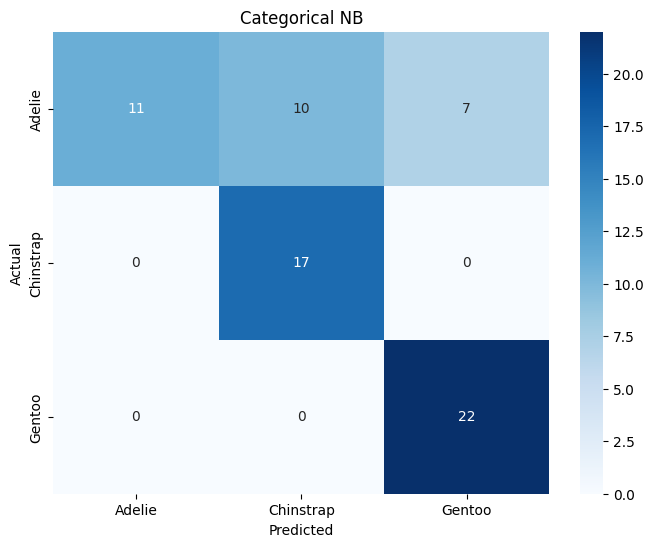

In [ ]:
modelPenguins = CategoricalNB()
modelPenguins.fit(x_penguin_train, y_penguin_train)
y_modelPenguins = modelPenguins.predict(x_penguin_test)
y_modelPenguins

y_penguin_test_df= y_penguin_test.to_frame()
y_penguin_test_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y_penguin_test_df

y_modelPenguins_df= pd.DataFrame(y_modelPenguins, columns = ['species'])
y_modelPenguins_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y_modelPenguins_array = y_modelPenguins_df['species'].to_numpy()
y_modelPenguins_array

conf_matrix = confusion_matrix(y_penguin_test_df['species'], y_modelPenguins_array)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Categorical NB')
plt.show()

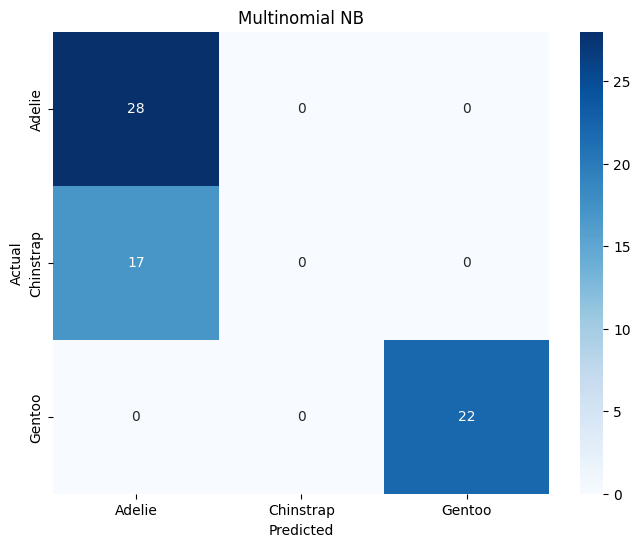

In [ ]:
modelPenguins = MultinomialNB()
modelPenguins.fit(x_penguin_train, y_penguin_train)
y_modelPenguins = modelPenguins.predict(x_penguin_test)
y_modelPenguins

y_penguin_test_df= y_penguin_test.to_frame()
y_penguin_test_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y_penguin_test_df

y_modelPenguins_df= pd.DataFrame(y_modelPenguins, columns = ['species'])
y_modelPenguins_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y_modelPenguins_array = y_modelPenguins_df['species'].to_numpy()
y_modelPenguins_array

conf_matrix = confusion_matrix(y_penguin_test_df['species'], y_modelPenguins_array)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multinomial NB')
plt.show()

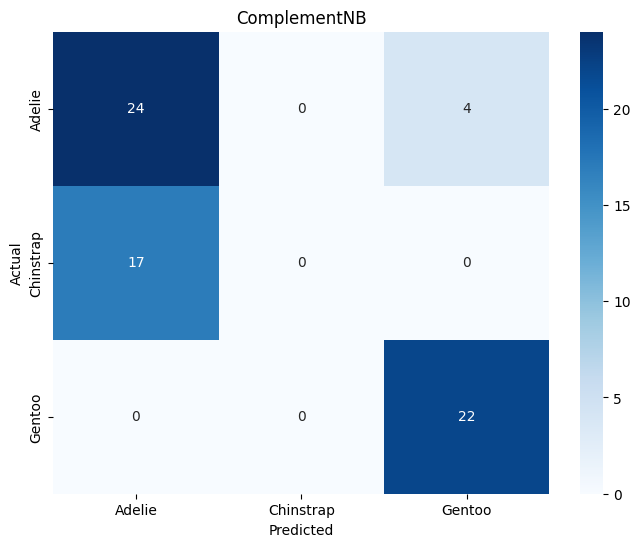

In [ ]:
modelPenguins = ComplementNB()
modelPenguins.fit(x_penguin_train, y_penguin_train)
y_modelPenguins = modelPenguins.predict(x_penguin_test)
y_modelPenguins

y_penguin_test_df= y_penguin_test.to_frame()
y_penguin_test_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y_penguin_test_df

y_modelPenguins_df= pd.DataFrame(y_modelPenguins, columns = ['species'])
y_modelPenguins_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y_modelPenguins_array = y_modelPenguins_df['species'].to_numpy()
y_modelPenguins_array

conf_matrix = confusion_matrix(y_penguin_test_df['species'], y_modelPenguins_array)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ComplementNB')
plt.show()

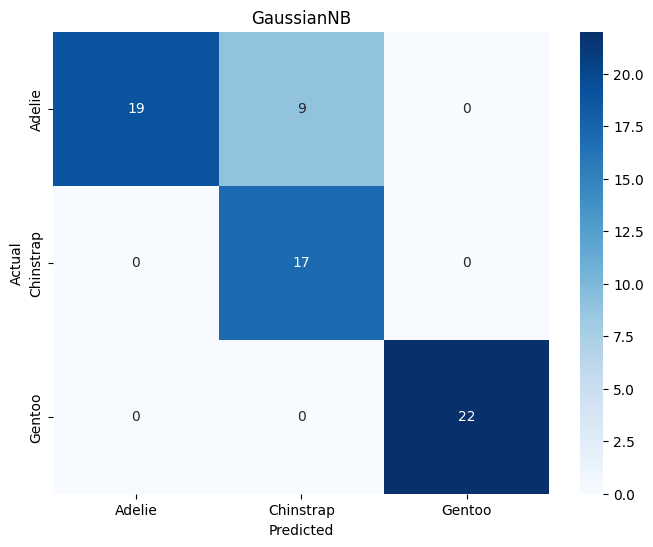

In [ ]:
modelPenguins = GaussianNB()
modelPenguins.fit(x_penguin_train, y_penguin_train)
y_modelPenguins = modelPenguins.predict(x_penguin_test)
y_modelPenguins

y_penguin_test_df= y_penguin_test.to_frame()
y_penguin_test_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y_penguin_test_df

y_modelPenguins_df= pd.DataFrame(y_modelPenguins, columns = ['species'])
y_modelPenguins_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y_modelPenguins_array = y_modelPenguins_df['species'].to_numpy()
y_modelPenguins_array

conf_matrix = confusion_matrix(y_penguin_test_df['species'], y_modelPenguins_array)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GaussianNB')
plt.show()

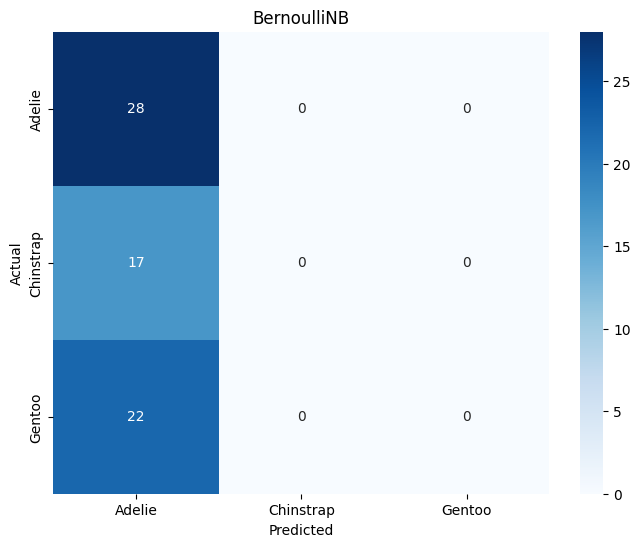

In [ ]:
modelPenguins = BernoulliNB()
modelPenguins.fit(x_penguin_train, y_penguin_train)
y_modelPenguins = modelPenguins.predict(x_penguin_test)
y_modelPenguins

y_penguin_test_df= y_penguin_test.to_frame()
y_penguin_test_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y_penguin_test_df

y_modelPenguins_df= pd.DataFrame(y_modelPenguins, columns = ['species'])
y_modelPenguins_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y_modelPenguins_array = y_modelPenguins_df['species'].to_numpy()
y_modelPenguins_array

conf_matrix = confusion_matrix(y_penguin_test_df['species'], y_modelPenguins_array)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BernoulliNB')
plt.show()